In [21]:
import os

# Get all folder names
path = 'cybersec-imagery/cybersecurity'
folders = [os.path.join(path, o) for o in os.listdir(path) 
                    if os.path.isdir(os.path.join(path,o))]
folders.sort()

#Get all images names

images = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        images.append(os.path.join(r, file))

for img in images:
    if ".DS_Store" in img:
        images.remove(img)
    elif ".json" in img:
        images.remove(img)

In [22]:
images[:5]

['cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/95_Cybersecurity101_Toolkit_1170x700.jpg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/96_cybersecurity-lock.jpeg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/55_cybersecurity_boards-100623183-large.jpg',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/16_cyber-security-hgtc.png',
 'cybersec-imagery/cybersecurity/2018-01-14T01:00:22.154886/90_cybersecurity.jpg?1438115350']

In [13]:
import tensorflow.keras
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 1s 0us/step


PIL image size (224, 224)


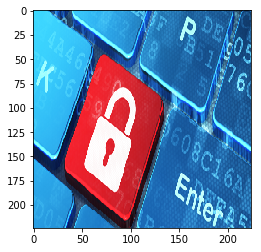

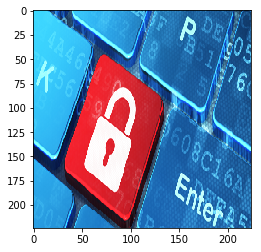

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


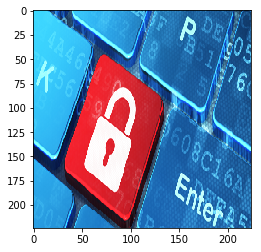

In [23]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

filename = images[3]
# load an image in PIL format
original = load_img(filename, target_size=(224,224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


In [24]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)


[[('n03085013', 'computer_keyboard', 0.41424194), ('n03902125', 'pay-phone', 0.086456835), ('n03187595', 'dial_telephone', 0.0760261), ('n03196217', 'digital_clock', 0.057328757), ('n03425413', 'gas_pump', 0.043578748)]]


The above results are the converted the result to human-readable labels. And they are sorted according to the confidence of prediction. The output shows the class ID, class name and the confidence of prediction.